### Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data collection and processing

In [5]:
#load dataset into pandas dataframe
gold_df = pd.read_csv("gld_price_data.csv")

In [7]:
# print first 5 rows in dataframe
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
# print last 5 rows
gold_df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
# find number of rows and colums in the df
gold_df.shape

(2290, 6)

In [13]:
# Getting basic information about dataframe
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
#checking number of missing values
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [27]:
# convert object into date time format
gold_df["Date"] = pd.to_datetime(gold_df["Date"], format="%m/%d/%Y")

In [29]:
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [31]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [33]:
# getting the satatistical measures
gold_df.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


### Correlation
#### 1. Positive correlation
#### 2. Negative correlation

In [36]:
correlation = gold_df.corr()

In [38]:
print(correlation)

             Date       SPX       GLD       USO       SLV   EUR/USD
Date     1.000000  0.944033  0.209118 -0.782230 -0.174108 -0.794540
SPX      0.944033  1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.209118  0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.782230 -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.174108 -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.794540 -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

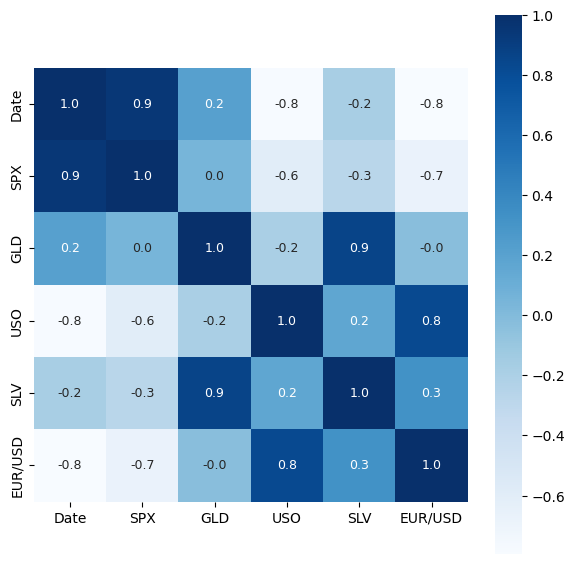

In [48]:
# Constructing the Heatmap to understand the correlation
plt.figure(figsize = (7,7))
sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={"size":9}, fmt=".1f", cmap="Blues")

In [52]:
# correlation values of gold
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


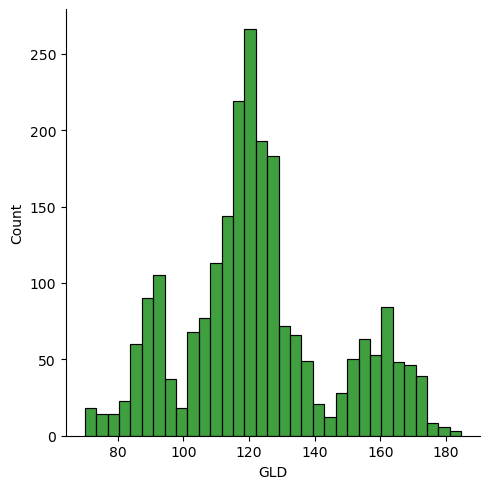

In [54]:
# checking the distribution of the gold price
sns.displot(gold_df["GLD"], color="green")

### Spliting the features and target

In [57]:
X = gold_df.drop(["Date", "GLD"], axis=1)
Y = gold_df["GLD"]

In [59]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Split into training and test data

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Model Training
#### Random Forest Regressor

In [65]:
regressor = RandomForestRegressor(n_estimators=100)

In [67]:
# training the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

### Model Evaluation

In [74]:
# prediction on training data
training_data_prediction = regressor.predict(x_train)

In [76]:
# R squared error on training data
training_error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared error on training data:", training_error_score)

R squared error on training data: 0.9985101931598899


In [78]:
# prediction on test data
test_data_prediction = regressor.predict(x_test)

# R squared error on test data
test_error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error on test data:", test_error_score)

R squared error on test data: 0.9890186939940432


### Compare the actual values and predicted values in a plot

In [81]:
y_test = list(y_test)

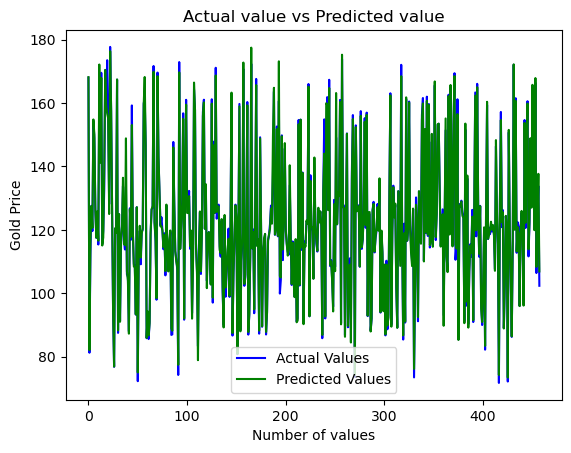

In [83]:
plt.plot(y_test, color="blue", label = "Actual Values")
plt.plot(test_data_prediction, color="green", label = "Predicted Values")
plt.title("Actual value vs Predicted value")
plt.xlabel("Number of values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()